In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
exp = pd.read_csv("/home/jg2447/slayman/GTEX/data/GTEX_download/GTEx_Analysis_v8_eQTL_expression_matrices/Whole_Blood.v8.normalized_expression.bed.gz", sep="\t")
exp = exp.iloc[:, 3:]

data = sc.read_h5ad("../../data/perturb/K562_gwps_normalized_bulk_01.h5ad")
genes = pd.read_csv("../../result/data/genes_gene_perturb", header=None)[0].values
eid2name = data.var[data.var['gene_name'].isin(genes)]['gene_name'].to_dict()

exp['gene_id'] = exp['gene_id'].str.split(".", expand=True)[0].map(eid2name)
exp = exp.dropna().set_index("gene_id").T.copy()

exp_corr = exp.corr()

In [3]:
corr = pd.DataFrame(exp_corr.values.reshape(-1))
corr[1] = list(exp_corr.index) * 2268
corr[2] = np.repeat(list(exp_corr.index), 2268)

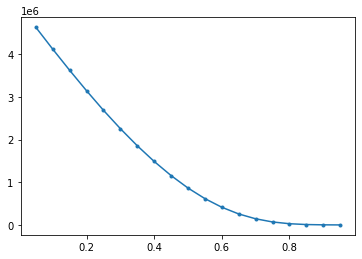

In [4]:
result = []
for ii in np.arange(0.05, 1, 0.05):
    sub_corr = corr.loc[corr[0].abs()>ii, [1, 2]] # threshold based on R2 of expression
    result.append(sub_corr.shape[0])
plt.plot(np.arange(0.05, 1, 0.05), result, ".-")

In [5]:
sub_corr = corr.loc[corr[0].abs()>0.75, [1, 2]] # threshold based on R2 of expression
sub_corr = sub_corr[sub_corr[1] != sub_corr[2]] # remove self loop

In [6]:
genes_df = pd.read_csv("../../result/data/genes_gene_perturb", header=None)
name2id = genes_df.reset_index().set_index(0)['index'].to_dict()
sub_corr[1] = sub_corr[1].map(name2id)
sub_corr[2] = sub_corr[2].map(name2id)

In [7]:
sub_corr.sort_values([1, 2]).to_csv("../../result/network/CoExpr_GTEx_0.75.tsv", sep="\t", header=False, index=False)